# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

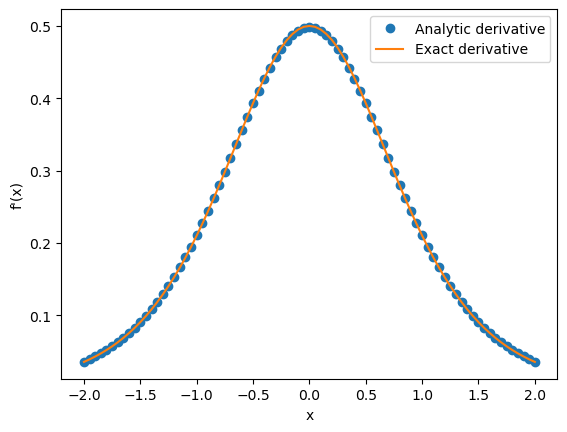

In [1]:
# code
# central difference formula
# f'(x_i) = [f(x_{i+1}) - f(x_{i-1})]/(x_{i+1} - x_{i-1})

# f(x) = 1 + (1/2) * tanh(x)
# f'(x) = (1/2)*sech^2(x)

import numpy as np
import matplotlib.pyplot as plt

# define the function
def f(x):
    return 1 + (1/2) * np.tanh(x)

# create an array of points where we want to calculate the derivatives
x = np.arange(-2, 2.05, 0.05)

# give a spacing
h = 0.1

# use the central difference formula
df_numerical = (f(x + h) - f(x - h))/(2*h)

# calculate the exact derivatives
df_analytic = (1/2) * (1/(np.cosh(x))**2)

# plot the numerical and the analytic derivatives
plt.plot(x, df_numerical, 'o', x, df_analytic)
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend(['Analytic derivative', 'Exact derivative'])
plt.show()


#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

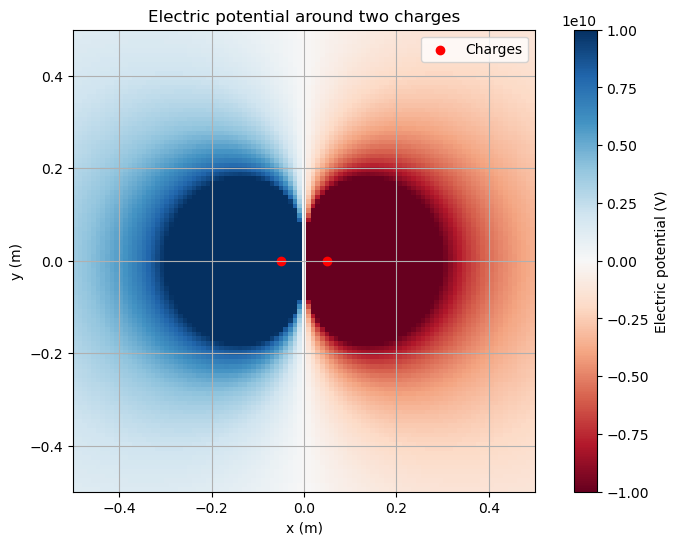

In [2]:
# code
# There are two charges q_1 = +1 C and q_2 = -1 C
# Distance between the charge = 10 cm = 0.1 m
# 1 m x 1 m plane (or grid)
# Grid spacing = 1 cm
# \phi(r) = phi(x,y) = 1/(4*pi*\epsilon_0) * \sum_{i = 1}^2 [q_i/((x - x_i)^2 + (y - y_1)^2)^0.5]

import numpy as np
import matplotlib.pyplot as plt

K  = 9.0e9  # Nm^2/C^2 ( = 1/(4 \pi \varepsilon_0))
q1 = 1      # in coulomb
q2 = -1     # in coulomb
d  = 0.1    # distance between q1 and a2 in metre
h  = 0.01   # distance between points on the grid in metre

# Create a grid
x = np.arange(-0.5, 0.5 + h, h)
y = np.arange(-0.5, 0.5 + h, h)
X, Y = np.meshgrid(x, y)

# Charge positions
x1, y1 = -d/2, 0
x2, y2 = d/2, 0

# Distance from charges
r1 = np.sqrt((X - x1)**2 + (Y - y1)**2)
r2 = np.sqrt((X - x2)**2 + (Y - y2)**2)

# Prevent division by zero
r1 = np.where(r1 == 0, 1e-10, r1)
r2 = np.where(r2 == 0, 1e-10, r2)

# Compute potential
V = K*q1/r1 + K*q2/r2

# Avoid bad color scaling
V = np.clip(V, -1e10, 1e10)

# Plot the potential
plt.figure(figsize = (10, 6))
plt.imshow(V, extent = (-0.5, 0.5, -0.5, 0.5), origin = 'lower', cmap = 'RdBu')
plt.colorbar(label = 'Electric potential (V)')
plt.scatter([x1, x2], [y1, y2], color = 'red', marker = 'o', label = 'Charges')
plt.title('Electric potential around two charges')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

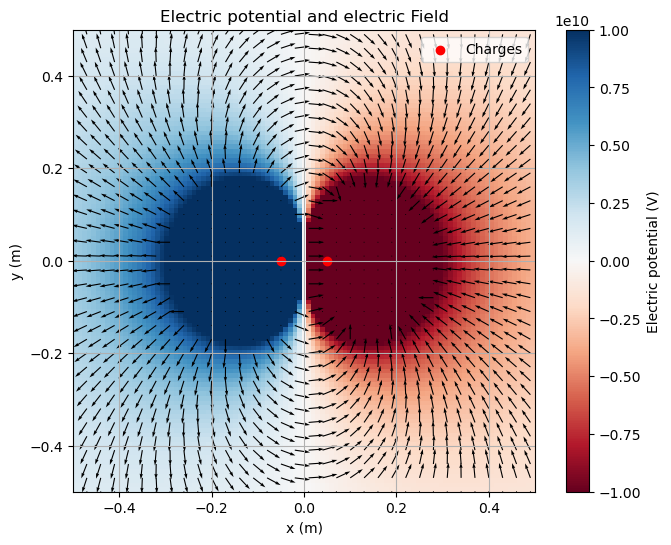

In [3]:
# code
# \vec{E} = -\vec{\nabla}\phi(r)

# Initialize electric field components Ex and Ey with zeros
Ex = np.zeros_like(V)
Ey = np.zeros_like(V)

# Grid size
rows, cols = V.shape

# Compute Ex = -dV/dx and Ey = -dV/dy using central difference method
for i in range(1, rows - 1):  # avoid edges
    for j in range(1, cols - 1):
        Ex[i, j] = -(V[i, j + 1] - V[i, j - 1]) / (2 * h)
        Ey[i, j] = -(V[i + 1, j] - V[i - 1, j]) / (2 * h)

# Normalize electric field for better visualization
E   = np.sqrt(Ex**2 + Ey**2)
Ex /= E + 1e-10  # avoid division by zero
Ey /= E + 1e-10

# Plot the potential
plt.figure(figsize = (8, 6))
plt.imshow(V, extent = (-0.5, 0.5, -0.5, 0.5), origin = 'lower', cmap = 'RdBu')
plt.colorbar(label = 'Electric potential (V)')
plt.scatter([x1, x2], [y1, y2], color = 'red', marker = 'o', label = 'Charges')

# Plot electric field (quiver gives arrows)
N = 3    # Select fewer points for quiver plot
plt.quiver(X[::N, ::N], Y[::N, ::N], Ex[::N, ::N], Ey[::N, ::N], color = 'black', scale = 30)
#plt.quiver(X, Y, Ex, Ey, color = 'black', scale = 30)
plt.title('Electric potential and electric Field')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

In [4]:
# code to do exercise 6.1 (network of resistors)
import numpy as np
from numpy.linalg import solve

# number of unknowns
n = 4

# to store the solutions
x = np.zeros(n)

# augmented matrix
a = [[ 4, -1, -1, -1, 5 ],
     [-1,  0,  3,  0, 5 ],
     [-1,  3,  0, -1, 0 ],
     [-1, -1,  0,  4, 0]]

# forward Elimination
for i in range(n):
    if a[i][i] != 0.0:
        for j in range(i+1, n):
            r = a[j][i]/a[i][i]
            
            for k in range(n+1):
                a[j][k] = a[j][k] - r * a[i][k]
    else:
        print('Division by zero')

# back substitution
x[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2, -1, -1):
    x[i] = a[i][n]
    
    for j in range(i+1, n):
        x[i] = x[i] - a[i][j]*x[j]
    
    x[i] = x[i]/a[i][i]

print('The solution is:')
for i in range(n):
    print('x%d = %0.2f' %(i, x[i]), end = '\n')



# Checking the solutions using numpy
print(' ')
print('Checking the solutions using numpy')
A = np.array([[  4, -1, -1, -1 ],
              [ -1,  0,  3,  0 ],
              [ -1,  3,  0, -1 ],
              [ -1, -1,  0,  4 ]])

V = np.array([ 5, 5, 0, 0 ])
Vsol = solve(A, V)
print([f"{x:.2f}" for x in Vsol])

The solution is:
x0 = 2.34
x1 = 1.06
x2 = 2.45
x3 = 0.85
 
Checking the solutions using numpy
['2.34', '1.06', '2.45', '0.85']


In [5]:
# code without partial pivoting to solve Eq. (6.1)

# To solve:
#     2w + x + 4y + z = -4
#     3w + 4x - y - z = 3
#     w - 4x + y + 5z = 9
#     2w - 2x + y + 3z = 7

import numpy as np

# number of unknowns
n = 4

# to store the solutions
x = np.zeros(n)

# augmented matrix
a = [[2,  1,  4,  1, -4],
     [3,  4, -1, -1, 3],
     [1, -4,  1,  5, 9],
     [2, -2,  1,  3, 7]]

# forward Elimination
for i in range(n):
    if a[i][i] != 0.0:
        for j in range(i+1, n):
            r = a[j][i]/a[i][i]
            
            for k in range(n+1):
                a[j][k] = a[j][k] - r * a[i][k]
    else:
        print('Division by zero')

# back substitution
x[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2, -1, -1):
    x[i] = a[i][n]
    
    for j in range(i+1, n):
        x[i] = x[i] - a[i][j]*x[j]
    
    x[i] = x[i]/a[i][i]

print('The solution is:')
for i in range(n):
    print('x%d = %0.2f' %(i, x[i]), end = '\n')

The solution is:
x0 = 2.00
x1 = -1.00
x2 = -2.00
x3 = 1.00


In [6]:
# code with partial pivoting to solve Eq. (6.1)

import numpy as np

# number of unknowns
n = 4

# to store the solutions
x = np.zeros(n)

# augmented matrix
a = [[2,  1,  4,  1, -4],
     [3,  4, -1, -1, 3],
     [1, -4,  1,  5, 9],
     [2, -2,  1,  3, 7]]

# forward Elimination
for i in range(n):
    R = i    # find row with the largest element in column and swap
    for k in range(i+1, n):
        if abs(a[k][i]) > abs(a[R][i]):
            R = k
    a[i], a[R] = a[R], a[i]
    for j in range(i+1, n):
        r = a[j][i]/a[i][i]
            
        for k in range(n+1):
            a[j][k] = a[j][k] - r * a[i][k]

# back substitution
x[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2, -1, -1):
    x[i] = a[i][n]
    
    for j in range(i+1, n):
        x[i] = x[i] - a[i][j]*x[j]
    
    x[i] = x[i]/a[i][i]

print('The solution is:')
for i in range(n):
    print('x%d = %0.2f' %(i, x[i]), end = '\n')

The solution is:
x0 = 2.00
x1 = -1.00
x2 = -2.00
x3 = 1.00


In [7]:
# code with partial pivoting to solve Eq. (6.17)

import numpy as np

# number of unknowns
n = 4

# to store the solutions
x = np.zeros(n)

# augmented matrix
a = [[0,  1,  4,  1, -4],
     [3,  4, -1, -1, 3],
     [1, -4,  1,  5, 9],
     [2, -2,  1,  3, 7]]

# forward Elimination
for i in range(n):
    # find row with the largest element in the current column and swap
    R = i
    for k in range(i+1, n):
        if abs(a[k][i]) > abs(a[R][i]):
            R = k
    a[i], a[R] = a[R], a[i]
    for j in range(i+1, n):
        r = a[j][i]/a[i][i]
            
        for k in range(n+1):
            a[j][k] = a[j][k] - r * a[i][k]

# back substitution
x[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2, -1, -1):
    x[i] = a[i][n]
    
    for j in range(i+1, n):
        x[i] = x[i] - a[i][j]*x[j]
    
    x[i] = x[i]/a[i][i]

print('The solution is:')
for i in range(n):
    print('x%d = %0.2f' %(i, x[i]), end = '\n')




# Checking the solutions using numpy
print(' ')
print('Checking the solutions using numpy')
A = np.array([[0,  1,  4,  1],
              [3,  4, -1, -1],
              [1, -4,  1,  5],
              [2, -2,  1,  3]])

X = np.array([ -4, 3, 9, 7 ])
Xsol = solve(A, X)
print([f"{x:.2f}" for x in Xsol])



# Checking the solutions of resistors of network
print(' ')
print('Checking the solutions using numpy (resistors of network)')
A = np.array([[ 4, -1, -1, -1 ],
              [-1,  0,  3,  0 ],
              [-1,  3,  0, -1 ],
              [-1, -1,  0,  4 ]])

X = np.array([ 5, 5, 0, 0 ])
Xsol = solve(A, X)
print([f"{x:.2f}" for x in Xsol])

The solution is:
x0 = 1.62
x1 = -0.43
x2 = -1.24
x3 = 1.38
 
Checking the solutions using numpy
['1.62', '-0.43', '-1.24', '1.38']
 
Checking the solutions using numpy (resistors of network)
['2.34', '1.06', '2.45', '0.85']
